In [1]:
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn-colorblind')

In [2]:
plt.rcParams["font.family"] = "Times New Roman"

# Load data
Source: https://www.berlin.de/polizei/service/kriminalitaetsatlas/

In [3]:
file_name = "/Users/abhirupghosh/Desktop/Fallzahlen&HZ 2012-2020.xlsx"

# We only need the sheets Fallzahlen_${YEAR} and HZ_${YEAR} from the years 2012-2020; can ignore the other sheets
years = np.arange(2012, 2021, 1)
relevant_sheets = [f'Fallzahlen_{int(n)}' for n in years]# + [f'HZ_{int(n)}' for n in years] # restrict ourselves to the case numbers

df_full = pd.read_excel(file_name, sheet_name=relevant_sheets, header=4)

# Clean data

In [4]:
# The columns Wohnraumeinbruch and Rauschgiftdelikte have been 
# spelled in two different ways and need to be corrected

for sheet in relevant_sheets:
    df_full[sheet] = df_full[sheet].rename(columns={"Wohnraum-\neinbruch":"Wohnraum\n-einbruch",
                                                      "Rauschgif-tdelikte": "Rauschgift-delikte"})
    
    # For the purpose of concatenating, we insert the year of a particular sheet
    # as a separate column
    df_full[sheet]['Jahr'] = int(sheet[-4:])

# concatenate the individual excel sheets  into one complete pandas dataframe
df = pd.concat(df_full, ignore_index=True)
#df.columns

# District-wise

## Total crimes: yearly trend

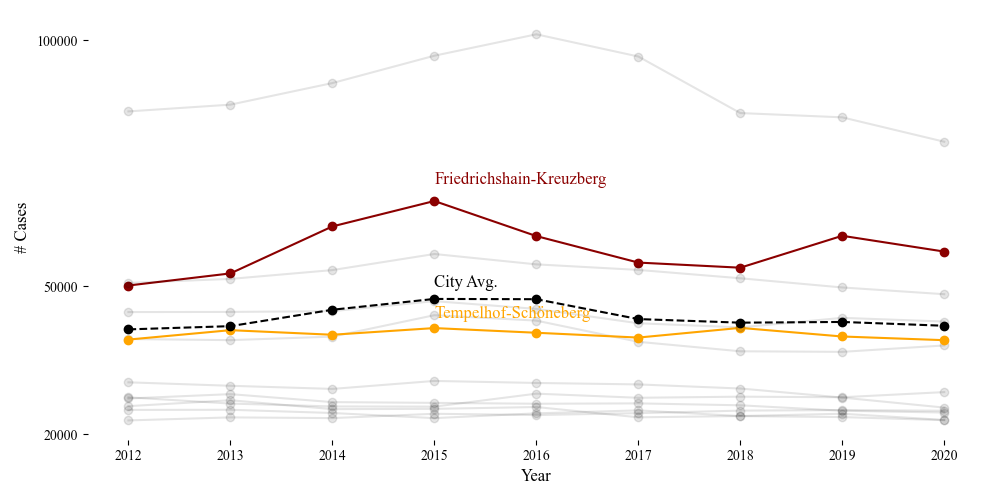

In [5]:
# get the list of districts (boroughs) in Berlin
district_list = df[df['LOR-Schlüssel (Bezirksregion)']%10000 == 0]['Bezeichnung (Bezirksregion)'].unique()
#print(district_list)

fig, ax = plt.subplots(figsize=(10,5))

# Plot the yearly total crimes trend for each borough
for district in district_list:
    
    x = df[df['Bezeichnung (Bezirksregion)'] == district]['Jahr']
    y = df[df['Bezeichnung (Bezirksregion)'] == district]['Straftaten \n-insgesamt-']
    
    if district == 'Friedrichshain-Kreuzberg':
        ax.plot(x,y, '-o', color='darkred')
    elif district == 'Tempelhof-Schöneberg':
        ax.plot(x,y, '-o', color='orange')
    else:
        ax.plot(x,y, '-o', color='k', alpha=0.1)

# Plot the average yearly total crimes trend for the entire city (crudely divide by total number of boroughs)
x_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Jahr']
y_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Straftaten \n-insgesamt-']

ax.plot(x_city,y_city/len(district_list), '--o', color='k')
        
ax.set_xlabel('Year', size='large')
ax.set_ylabel('# Cases', size='large')
ax.get_yaxis().set_ticks([20000, 50000, 100000])

ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Friedrichshain-Kreuzberg']['Straftaten \n-insgesamt-'].iloc[3]*1.05, 'Friedrichshain-Kreuzberg', fontsize='large', color='darkred')
ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Tempelhof-Schöneberg']['Straftaten \n-insgesamt-'].iloc[3]*1.05, 'Tempelhof-Schöneberg', fontsize='large', color='orange')        
ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Straftaten \n-insgesamt-'].iloc[3]*1.05/len(district_list), 'City Avg.', fontsize='large', color='k')        

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()    
plt.savefig("district_crime.png")

## Causes split: yearly trend

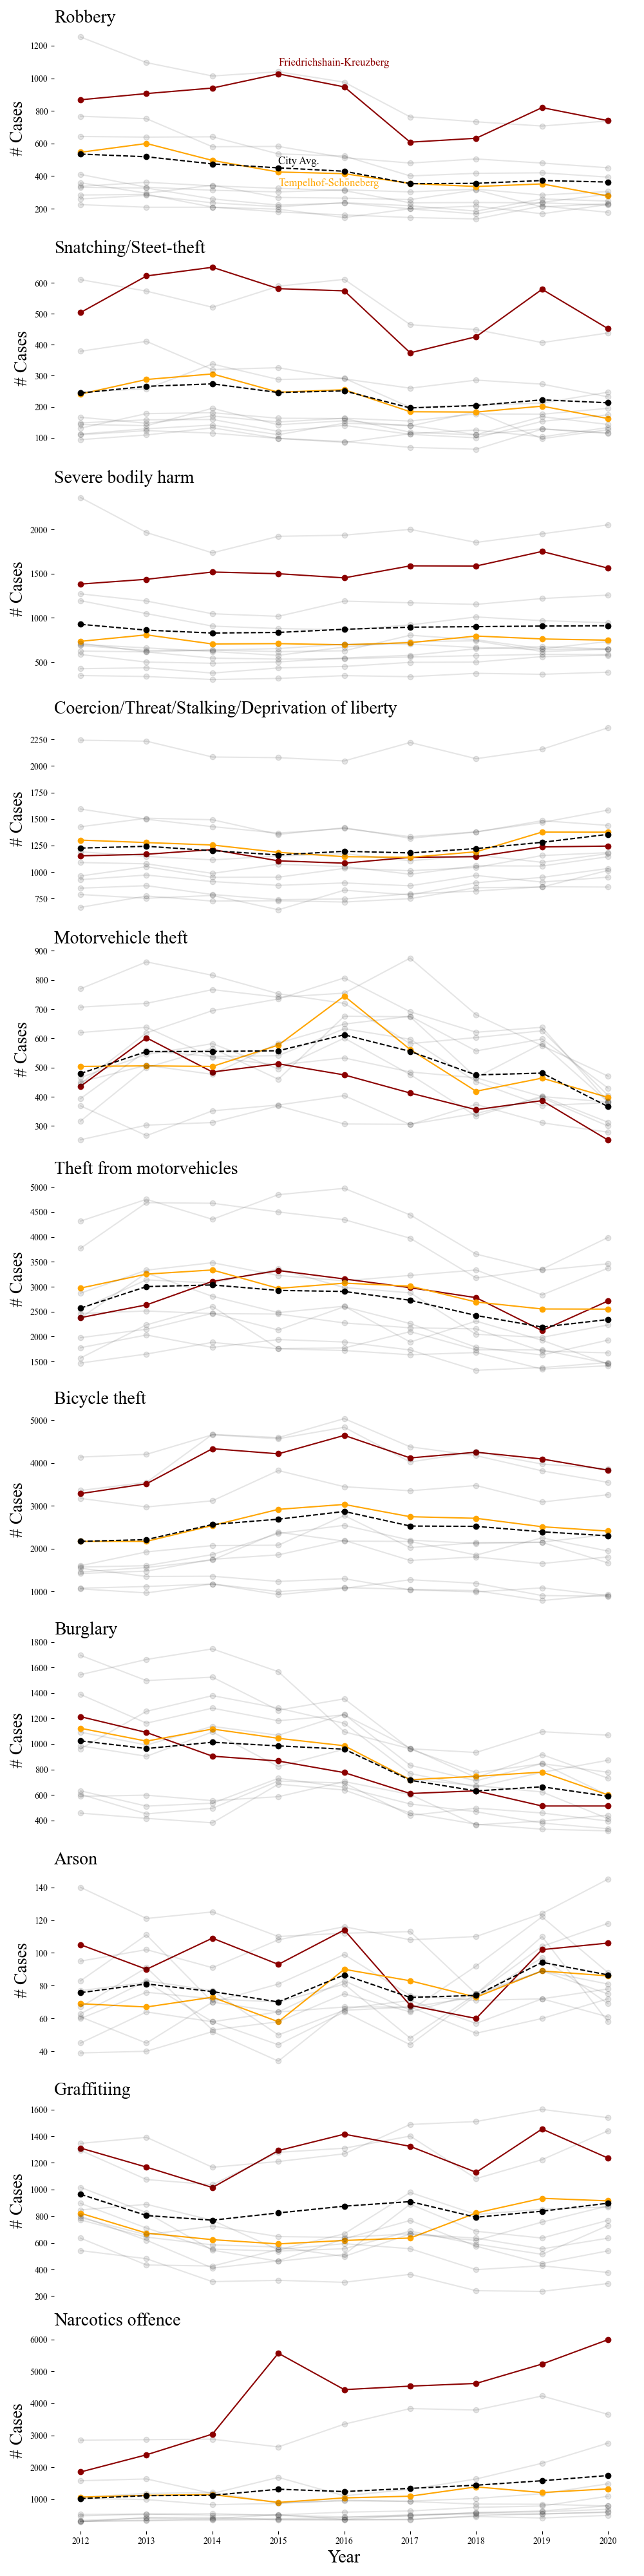

In [6]:
# we restrict ourselves to some of the most interesting causes (personal judgement)
revelant_cols = ['Raub', 'Straßenraub,\nHandtaschen-raub',
       'Gefährl. und schwere Körper-verletzung',
       'Freiheits-beraubung, Nötigung,\nBedrohung, Nachstellung', 'Diebstahl von Kraftwagen',
       'Diebstahl \nan/aus Kfz', 'Fahrrad-\ndiebstahl', 'Wohnraum\n-einbruch','Brand-\nstiftung',
       'Sach-beschädigung durch Graffiti','Rauschgift-delikte'] # did not use the total ones

# create a map between german and engalish translations for the plot labels
labels_map_german_english = {'Raub': 'Robbery', 
                   'Straßenraub,\nHandtaschen-raub': 'Snatching/Steet-theft',
                   'Gefährl. und schwere Körper-verletzung': 'Severe bodily harm',
                   'Freiheits-beraubung, Nötigung,\nBedrohung, Nachstellung': 'Coercion/Threat/Stalking/Deprivation of liberty', 
                    'Diebstahl von Kraftwagen': 'Motorvehicle theft',
                   'Diebstahl \nan/aus Kfz': 'Theft from motorvehicles', 
                   'Fahrrad-\ndiebstahl': 'Bicycle theft',  
                   'Wohnraum\n-einbruch': 'Burglary',
                   'Brand-\nstiftung': 'Arson',
                   'Sach-beschädigung durch Graffiti': 'Graffitiing',
                   'Rauschgift-delikte': 'Narcotics offence' }

fig, axs = plt.subplots(ncols=1, nrows=len(revelant_cols), figsize=(10,40));

# display the graph through subplots, each for a separate reason
for n, col in enumerate(revelant_cols):
    ax = axs[n]
    for district in district_list:
        x = df[df['Bezeichnung (Bezirksregion)'] == district]['Jahr']
        y = df[df['Bezeichnung (Bezirksregion)'] == district][col]
    
        if district == 'Friedrichshain-Kreuzberg':
            ax.plot(x,y, '-o', color='darkred')
        elif district == 'Tempelhof-Schöneberg':
            ax.plot(x,y, '-o', color='orange')
        else:
            ax.plot(x,y, '-o', color='k', alpha=0.1)
            
    if n == 0:
        ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Friedrichshain-Kreuzberg'][col].iloc[3]*1.05, 'Friedrichshain-Kreuzberg', fontsize='large', color='darkred')
        ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Tempelhof-Schöneberg'][col].iloc[3]*0.8, 'Tempelhof-Schöneberg', fontsize='large', color='orange')        
        ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)'][col].iloc[3]*1.05/len(district_list), 'City Avg.', fontsize='large', color='k')        
   

            
    # total
    x_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Jahr']
    y_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)'][col]

    ax.plot(x_city,y_city/len(district_list), '--o', color='k')

    ax.set_ylabel('# Cases', size=20)
    ax.set_title(labels_map_german_english[col], fontsize=20, loc='left');
    
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.set_xticks([])
    
ax.set_xlabel('Year', fontsize=20)
ax.set_xticks(x)
plt.tight_layout()    
plt.savefig("district_crime_subreasons.png")

# Sub-district-wise

## Total crimes: yearly trend

In [7]:
# get the list of subdistricts in Berlin
subdistrict_list = df[df['LOR-Schlüssel (Bezirksregion)']%10000 != 0]['Bezeichnung (Bezirksregion)'].unique()
subdistrict_list = subdistrict_list[:-2]
#print(subdistrict_list)

# Of particular interest: the subdistricts in my current and previous Boroughs
xberg_subdistrict_list = df[(df['LOR-Schlüssel (Bezirksregion)']).gt(20000) & (df['LOR-Schlüssel (Bezirksregion)']).lt(21000)]['Bezeichnung (Bezirksregion)'].unique()
#print(xberg_subdistrict_list)

schtem_subdistrict_list = df[(df['LOR-Schlüssel (Bezirksregion)']).gt(70000) & (df['LOR-Schlüssel (Bezirksregion)']).lt(71000)]['Bezeichnung (Bezirksregion)'].unique()
#print(schtem_subdistrict_list)

/Users/abhirupghosh/envs/higher-dimensional-cosmology_python3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


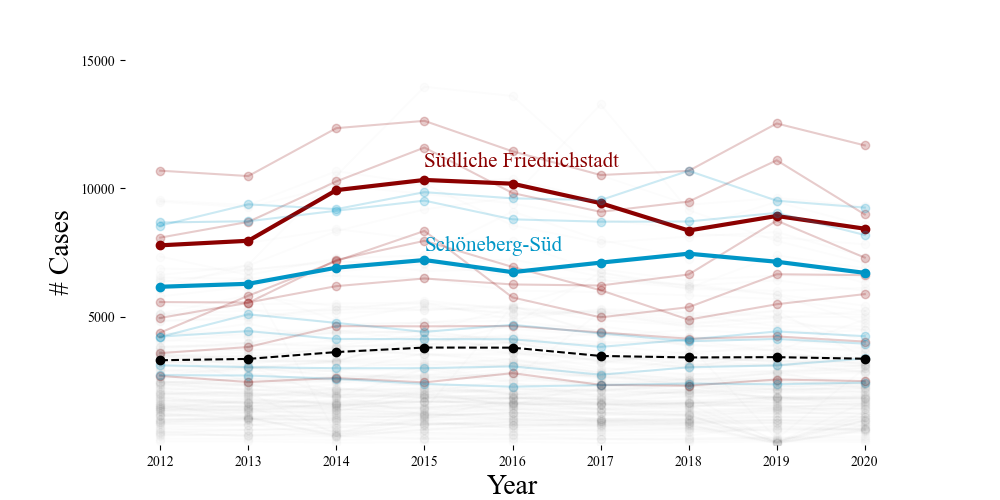

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

for subdistrict in subdistrict_list:
    x = df[df['Bezeichnung (Bezirksregion)'] == subdistrict]['Jahr']
    y = df[df['Bezeichnung (Bezirksregion)'] == subdistrict]['Straftaten \n-insgesamt-']
    
    if subdistrict == 'Südliche Friedrichstadt':
        ax.plot(x,y, '-o', color='darkred', lw=3)
    elif subdistrict in xberg_subdistrict_list:
        ax.plot(x,y, '-o', color='darkred', alpha=0.2)
    elif subdistrict == 'Schöneberg-Süd':
        ax.plot(x,y, '-o', color='#0096c7', lw=3)
    elif subdistrict in schtem_subdistrict_list:
        ax.plot(x,y, '-o', color='#0096c7', alpha=0.2)
    else:
        ax.plot(x,y, '-o', color='k', alpha=0.01)

# total
x_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Jahr']
y_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Straftaten \n-insgesamt-']

ax.plot(x_city,y_city/len(subdistrict_list), '--o', color='k')
        
ax.set_xlabel('Year', size=20)
ax.set_ylabel('# Cases', size=20)

ax.set_ylim([0,15000])
ax.get_yaxis().set_ticks([5000, 10000, 15000])

ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Südliche Friedrichstadt']['Straftaten \n-insgesamt-'].iloc[3]*1.05, 'Südliche Friedrichstadt', fontsize=15, color='darkred')
ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Schöneberg-Süd']['Straftaten \n-insgesamt-'].iloc[3]*1.05, 'Schöneberg-Süd', fontsize=15, color='#0096c7')        
ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Straftaten \n-insgesamt-'].iloc[3]*1.05/len(district_list), 'City Avg.', fontsize=15, color='k')        

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("subdistrict_crime.png")   

## Causes split: yearly trend

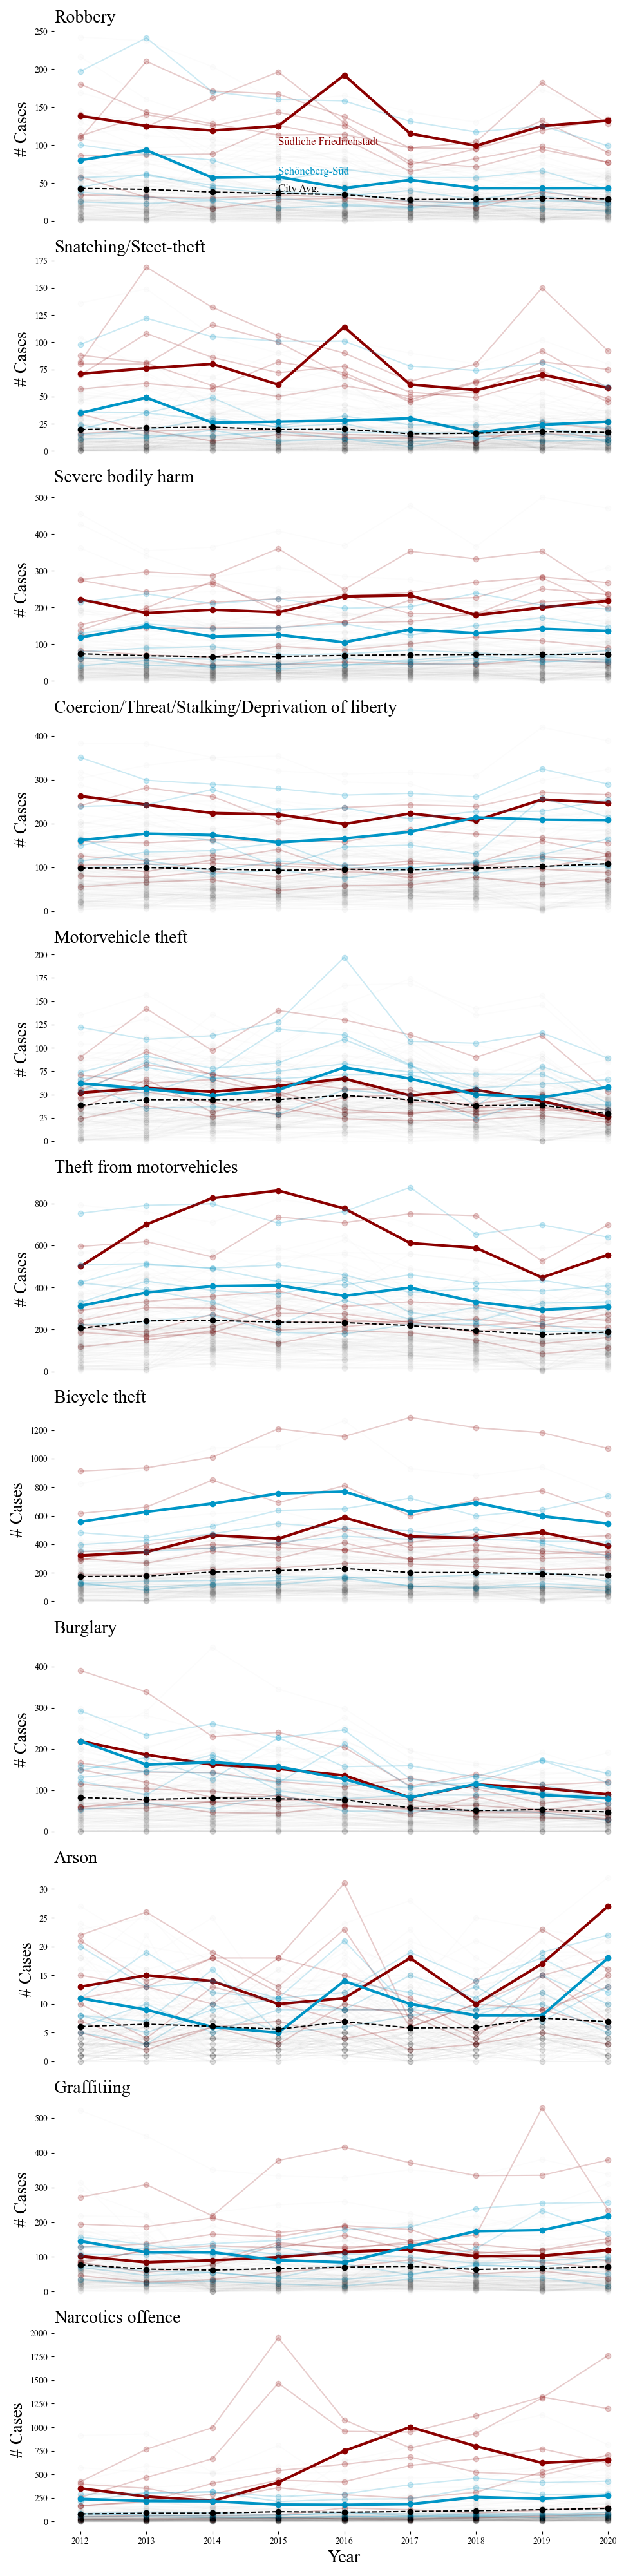

In [9]:
fig, axs = plt.subplots(ncols=1, nrows=len(revelant_cols), figsize=(10,40));

for n, col in enumerate(revelant_cols):
    ax = axs[n]
    for subdistrict in subdistrict_list:
        x = df[df['Bezeichnung (Bezirksregion)'] == subdistrict]['Jahr']
        y = df[df['Bezeichnung (Bezirksregion)'] == subdistrict][col]
    
        if subdistrict == 'Südliche Friedrichstadt':
            ax.plot(x,y, '-o', color='darkred', lw=3)
        elif subdistrict in xberg_subdistrict_list:
            ax.plot(x,y, '-o', color='darkred', alpha=0.2)
        elif subdistrict == 'Schöneberg-Süd':
            ax.plot(x,y, '-o', color='#0096c7', lw=3)
        elif subdistrict in schtem_subdistrict_list:
            ax.plot(x,y, '-o', color='#0096c7', alpha=0.2)
        else:
            ax.plot(x,y, '-o', color='k', alpha=0.01)
            
    if n == 0:
        ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Südliche Friedrichstadt'][col].iloc[3]*0.8, 'Südliche Friedrichstadt', fontsize='large', color='darkred')
        ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Schöneberg-Süd'][col].iloc[3]*1.05, 'Schöneberg-Süd', fontsize='large', color='#0096c7')        
        ax.text(2015, df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)'][col].iloc[3]*1.05/len(subdistrict_list), 'City Avg.', fontsize='large', color='k')        

    # total
    x_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Jahr']
    y_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)'][col]

    ax.plot(x_city,y_city/len(subdistrict_list), '--o', color='k')

    ax.set_ylabel('# Cases', size=20)
    ax.set_title(labels_map_german_english[col], fontsize=20, loc='left');
    
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.set_xticks([])
    
ax.set_xlabel('Year', fontsize=20)
ax.set_xticks(x)
plt.tight_layout()    
plt.savefig("subdistrict_crime_subreasons.png")

# Questions
* difference between Fall* and HZ
* 10 year pattern (also wrt other districts and city avvg)
* which sub crime is worse

# Per capita trends

## Population

In [10]:
# https://download.statistik-berlin-brandenburg.de/fa93e3bd19a2e885/a5ecfb2fff6a/SB_A01-05-00_2020h02_BE.pdf

population = np.array([[2008,3362843,323303,262251,356933,310763,215939,288060,326867,305517,236082,244637,251059,241432],
[2009,3369672,327082,259967,354711,312256,215444,289718,328097,307650,237753,244165,251626,241203],
[2010,3387562,326650,261090,360017,312340,218094,291700,329245,307204,239374,246225,253539,242084],
[2011,3427114,333152,265361,365021,314911,220645,293692,329361,313245,241487,249232,256280,244727],
[2012,3469621,339974,269471,370937,319289,223305,295746,328428,318356,243844,251879,260505,247887],
[2013,3517424,348102,273517,377532,322870,226868,298200,331822,322153,245951,254226,264858,251325],
[2014,3562166,356506,275691,384367,326354,230419,299268,335767,325716,249440,256173,268465,254000],
[2015,3610156,363236,278393,389976,330468,234630,299765,341161,328062,253333,259373,275142,256617],
[2016,3670622,371407,281323,397406,336249,239942,304086,346108,327522,259524,262015,283121,261919],
[2017,3711930,377965,283974,402289,338831,242143,307076,348739,329387,264999,266684,286246,263597],
[2018,3748148,383457,289120,407039,341327,243080,308077,351429,330786,269775,268739,290493,264826],
[2019,3769495,385748,290386,409335,343592,245197,310071,350984,329917,273689,269967,294201,266408],
[2020,3769962,383360,289787,410716,341392,245527,308840,349539,327945,276165,273731,296837,266123]])

population = pd.DataFrame(data=population, columns=['Jahr', 'Berlin', 'Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Steglitz-Zehlendorf',
       'Tempelhof-Schöneberg', 'Neukölln', 'Treptow-Köpenick',
       'Marzahn-Hellersdorf', 'Lichtenberg', 'Reinickendorf'])

population = population[4:]
population

Jahr   Berlin   Mitte  Friedrichshain-Kreuzberg  Pankow  \
4   2012  3469621  339974                    269471  370937   
5   2013  3517424  348102                    273517  377532   
6   2014  3562166  356506                    275691  384367   
7   2015  3610156  363236                    278393  389976   
8   2016  3670622  371407                    281323  397406   
9   2017  3711930  377965                    283974  402289   
10  2018  3748148  383457                    289120  407039   
11  2019  3769495  385748                    290386  409335   
12  2020  3769962  383360                    289787  410716   

    Charlottenburg-Wilmersdorf  Spandau  Steglitz-Zehlendorf  \
4                       319289   223305               295746   
5                       322870   226868               298200   
6                       326354   230419               299268   
7                       330468   234630               299765   
8                       336249   239942               304086   
9                       338831   242143               307076   
10                      341327   243080               308077   
11                      343592   245197               310071   
12                      341392   245527               308840   

    Tempelhof-Schöneberg  Neukölln  Treptow-Köpenick  Marzahn-Hellersdorf  \
4                 328428    318356            243844               251879   
5                 331822    322153            245951               254226   
6                 335767    325716            249440               256173   
7                 341161    328062            253333               259373   
8                 346108    327522            259524               262015   
9                 348739    329387            264999               266684   
10                351429    330786            269775               268739   
11                350984    329917            273689               269967   
12                349539    327945            276165               273731   

    Lichtenberg  Reinickendorf  
4        260505         247887  
5        264858         251325  
6        268465         254000  
7        275142         256617  
8        283121         261919  
9        286246         263597  
10       290493         264826  
11       294201         266408  
12       296837         266123

# Berlin cases by Borough per capita

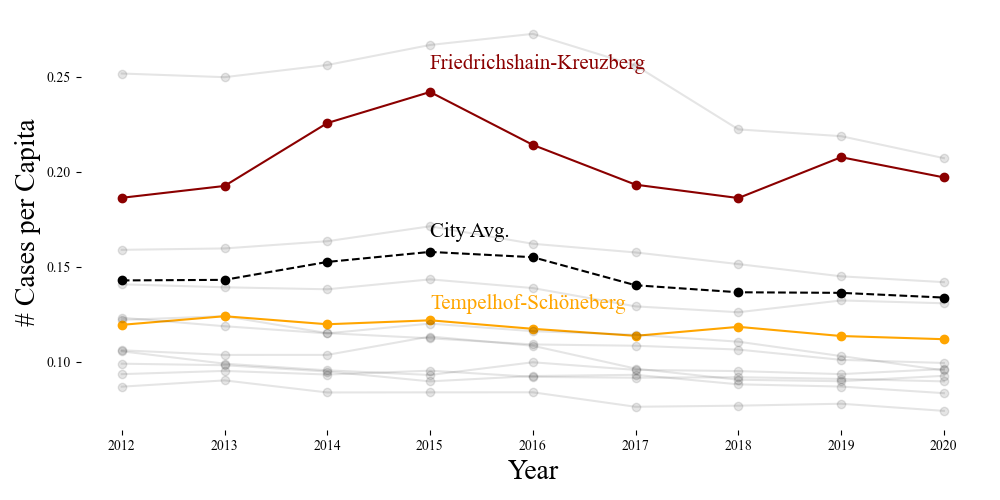

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

for district in district_list:
    x = df[df['Bezeichnung (Bezirksregion)'] == district]['Jahr']
    y = df[df['Bezeichnung (Bezirksregion)'] == district]['Straftaten \n-insgesamt-'].to_numpy() / population[district].to_numpy()
    
    if district == 'Friedrichshain-Kreuzberg':
        ax.plot(x,y, '-o', color='darkred')
        ax.text(2015, y[3]*1.05, district, fontsize=15, color='darkred')
    elif district == 'Tempelhof-Schöneberg':
        ax.plot(x,y, '-o', color='orange')
        ax.text(2015, y[3]*1.05, district, fontsize=15, color='orange')
    else:
        ax.plot(x,y, '-o', color='k', alpha=0.1)

# total
x_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Jahr']
y_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Straftaten \n-insgesamt-'].to_numpy() / population['Berlin'].to_numpy()

ax.plot(x_city,y_city, '--o', color='k')
ax.text(2015, y_city[3]*1.05, 'City Avg.', fontsize=15, color='k')
        
ax.set_xlabel('Year', size=20)
ax.set_ylabel('# Cases per Capita', size=20)
ax.get_yaxis().set_ticks([0.1, 0.15, 0.2, 0.25])

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("district_crime_percapita.png")

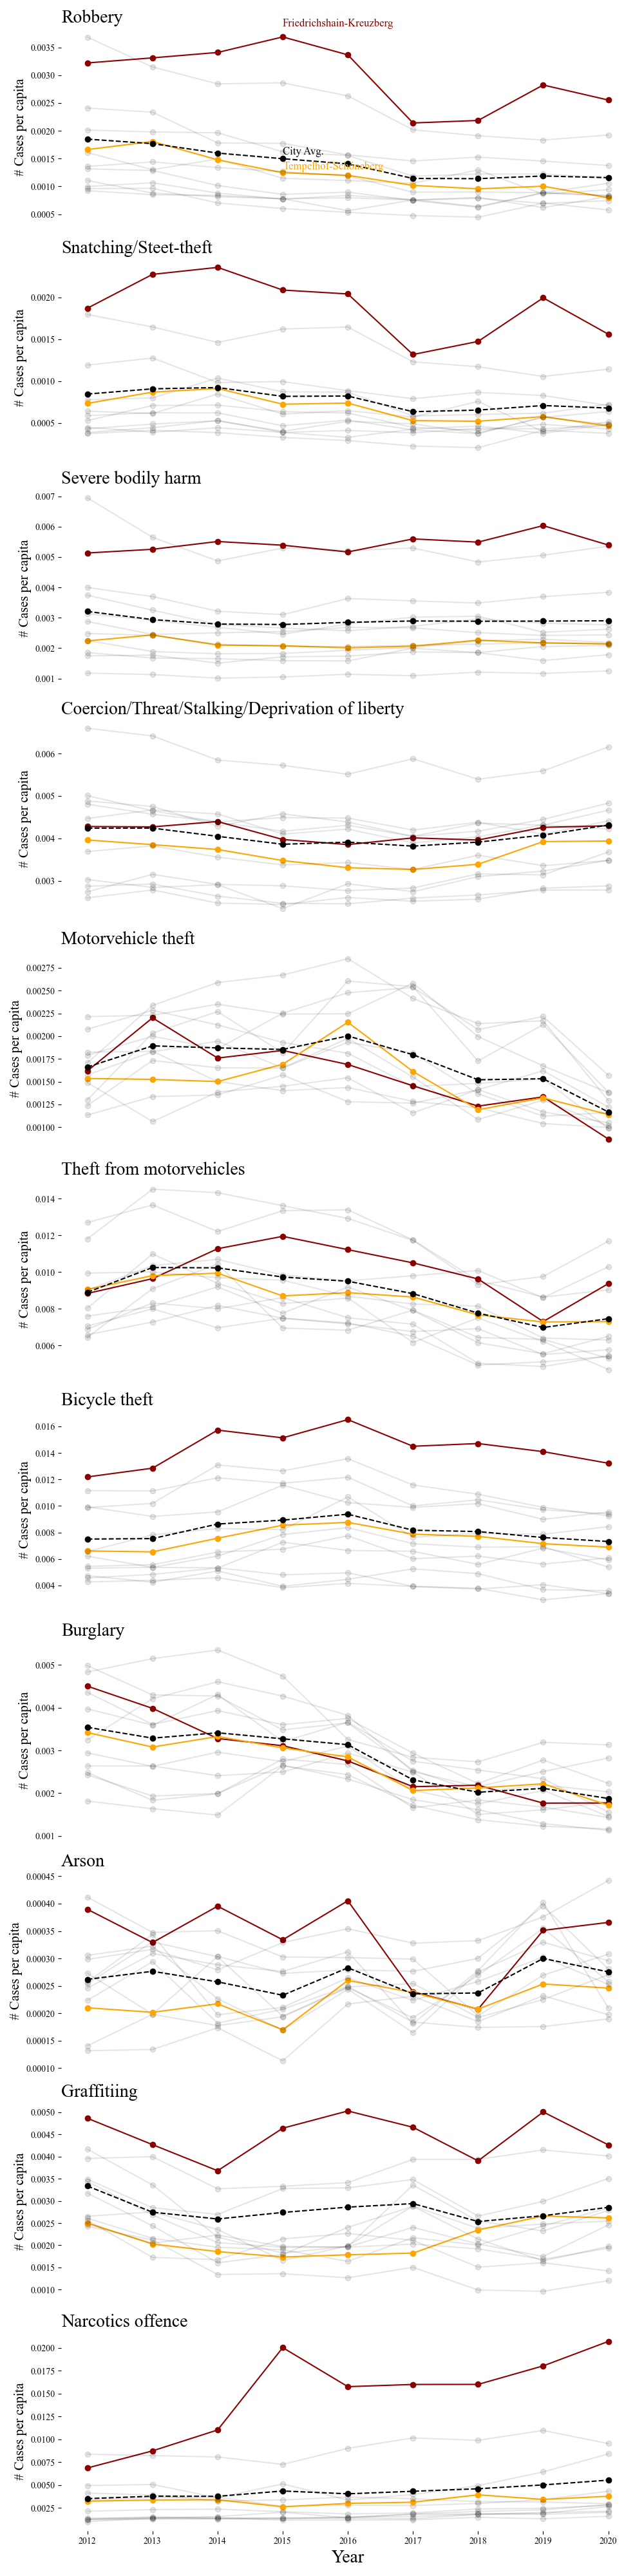

In [12]:
fig, axs = plt.subplots(ncols=1, nrows=len(revelant_cols), figsize=(10,40));


for n, col in enumerate(revelant_cols):
    ax = axs[n]
    for district in district_list:
        x = df[df['Bezeichnung (Bezirksregion)'] == district]['Jahr']
        y = df[df['Bezeichnung (Bezirksregion)'] == district][col].to_numpy() / population[district].to_numpy()
    
        if district == 'Friedrichshain-Kreuzberg':
            ax.plot(x,y, '-o', color='darkred')
            if n == 0:
                ax.text(2015, y[3]*1.05, district, fontsize='large', color='darkred')
        elif district == 'Tempelhof-Schöneberg':
            ax.plot(x,y, '-o', color='orange')
            if n == 0:
                ax.text(2015, y[3]*1.05, district, fontsize='large', color='orange')
        else:
            ax.plot(x,y, '-o', color='k', alpha=0.1)
                        
    # total
    x_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)']['Jahr']
    y_city = df[df['Bezeichnung (Bezirksregion)'] == 'Berlin (PKS gesamt)'][col].to_numpy() / population['Berlin'].to_numpy()

    ax.plot(x_city,y_city, '--o', color='k')
    if n == 0:
        ax.text(2015, y_city[3]*1.05, 'City Avg.', fontsize='large', color='k')

    ax.set_ylabel('# Cases per capita', size=15)
    ax.set_title(labels_map_german_english[col], fontsize=20, loc='left');
    
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.set_xticks([])
    
ax.set_xlabel('Year', fontsize=20)
ax.set_xticks(x)
plt.tight_layout()    
plt.savefig("district_crime_subreasons_percapita.png")